<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./23_ltpy_v01_Sentinel5p_L2_data.ipynb"><< 23 - Copernicus Sentinel-5 Precursor (Sentinel-5P) </a><span style="float:right;"><a href="./31_ltpy_v01_AC_SAF_L2_case_study.ipynb">31 - AC SAF Level 2 - Case studies >></a></span>

# 2.4 Copernicus Atmosphere Monitoring Service (CAMS) data

The Copernicus Atmopshere Monitoring Service (CAMS) provides consistent and quality-controlled information related to air pollution and health and greenhouse gases. CAMS data consist of `global forecasts and analyses`, `global reanalyses`, `fire emissions` and `greenhouse gas flux inversions`.

#### Module outline:
* [1 - Load, browse and plot CAMS fire emissions data](#load_gfas)
* [2 - Load, browse and plot CAMS greenhouse gas flux inversions](#load_ggf)

#### Load required libraries

In [1]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt
import matplotlib.colors
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [3]:
from ipynb.fs.full.ltpy_functions import visualize_imshow

<hr>

## <a id="cams_gfas"></a>Load, browse and plot CAMS fire emissions data

### Open a CAMS GFAS netCDF file with `xarray`

CAMS GFAS fire emission data can be retrieved in either `GRIB` or `NetCDF` format. With the Python library `xarray` and the `open_dataset` function, we can easily read a single `NetCDF` file.

CAMS GFAS fire emission data are three dimensional data, with the dimensions `latitude`, `longitude` and `time`. The data file loaded has three time steps, from 22 September to 24 September 2019 and a global spatial coverage. The xarray dataset contains a data variable called `frpfire`.

In [17]:
gfas_frpfire_xr = xr.open_dataset('./eodata/cams/gfas/20191022-24_gfas_radiative_power.nc')
gfas_frpfire_xr

<xarray.Dataset>
Dimensions:    (latitude: 1800, longitude: 3599, time: 3)
Coordinates:
  * longitude  (longitude) float32 -179.95 -179.85 -179.75 ... 179.75 179.85
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Data variables:
    frpfire    (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-09 09:34:26 GMT by grib_to_netcdf-2.13.0: grib_to_n...

We can select the data variable with `[]`, which gives us acces to the DataArray and more parameter attributes. Thus, the dataset values are `wildfire radiative power` and the parameter unit is `W m**-2`.

In [18]:
frpfire = gfas_frpfire_xr['frpfire']
frpfire

<xarray.DataArray 'frpfire' (time: 3, latitude: 1800, longitude: 3599)>
[19434600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.95 -179.85 -179.75 ... 179.75 179.85
  * latitude   (latitude) float32 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

With xarray's `where` function, we can build a geographical subset. Let's define a bounding box for south-east asia and subset the data. We see that the data has a negative _FillValue. Thus a next step is to filter negative values and set them to NaN.

In [19]:
latmin=-20
latmax=30
lonmin=80
lonmax=160
frpfire_subset = frpfire.where((frpfire.latitude < latmax) & (frpfire.latitude > latmin) & (frpfire.longitude < lonmax) & (frpfire.longitude > lonmin),drop=True)
frpfire_subset

<xarray.DataArray 'frpfire' (time: 3, latitude: 500, longitude: 800)>
array([[[-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        ...,
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06]],

       [[-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        ...,
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06]],

       [[-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        ...,
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.907349e-06],
        [-1.907349e-06, -1.907349e-06, ..., -1.907349e-06, -1.

In [20]:
frpfire_subset.values[frpfire_subset.values<0]=np.nan
frpfire_subset

<xarray.DataArray 'frpfire' (time: 3, latitude: 500, longitude: 800)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 80.05 80.15 80.25 ... 159.75 159.85 159.95
  * latitude   (latitude) float32 29.95 29.85 29.75 ... -19.75 -19.85 -19.95
  * time       (time) datetime64[ns] 2019-09-22 2019-09-23 2019-09-24
Attributes:
    units:      W m**-2
    long_name:  Wildfire radiative power

### Visualize CAMS GFAS fire emissions data

In [25]:
def visualize_imshow(data_array, projection, extent,conversion_factor, color_scale, vmin, vmax, set_global=False):
    """ 
    Visualizes a numpy MaskedArray with matplotlib's 'imshow' function.
    
    Parameters:
        data_array: any numpy MaskedArray, e.g. loaded with the NetCDF library and the Dataset function
        projection: a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
        extent: list with the following order - [min(lon),max(lon),max(lat),min(lat)]
        conversion_factor(float): any number to convert the DataArray values
        color_scale(str): string taken from matplotlib's color ramp reference  
        vmin(int): minimum number on visualisation legend
        vmax(int): maximum number on visualisation legend
        set_global: set True, if the plot shall have a global coverage
    """
    fig=plt.figure(figsize=(20, 12))

    ax=plt.axes(projection=projection)
    ax.coastlines()
    ax.gridlines()
    if(set_global):
        ax.set_global()

    ax.set_title(data_array.long_name, fontsize=20, pad=20.0)

    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    
    gl.xlabel_style={'size':14}
    gl.ylabel_style={'size':14}

    
    cmap = matplotlib.colors.ListedColormap(['#330305','#620103','#880105','#B00602','#DA0302','#FF0907','#FD3304','#FF3106', 
                                  '#FF5A02', '#FC8706','#FDB004','#FADD02','#FFFF0C','#FEFF47','#FFFE85','#FFFEC5',
                                  '#FFFFFF'])
    bounds=[0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,3]
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    
    img1 = plt.imshow(data_array[:]*conversion_factor,
           extent=extent,
           cmap=cmap,
           aspect='auto',
           norm=LogNorm(vmin=vmin, vmax=vmax))



    cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(str(conversion_factor) + ' ' + data_array.units, fontsize=16)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.set_xticklabels([0.0001,0.001,0.01,0.2,2])
    
    plt.show()

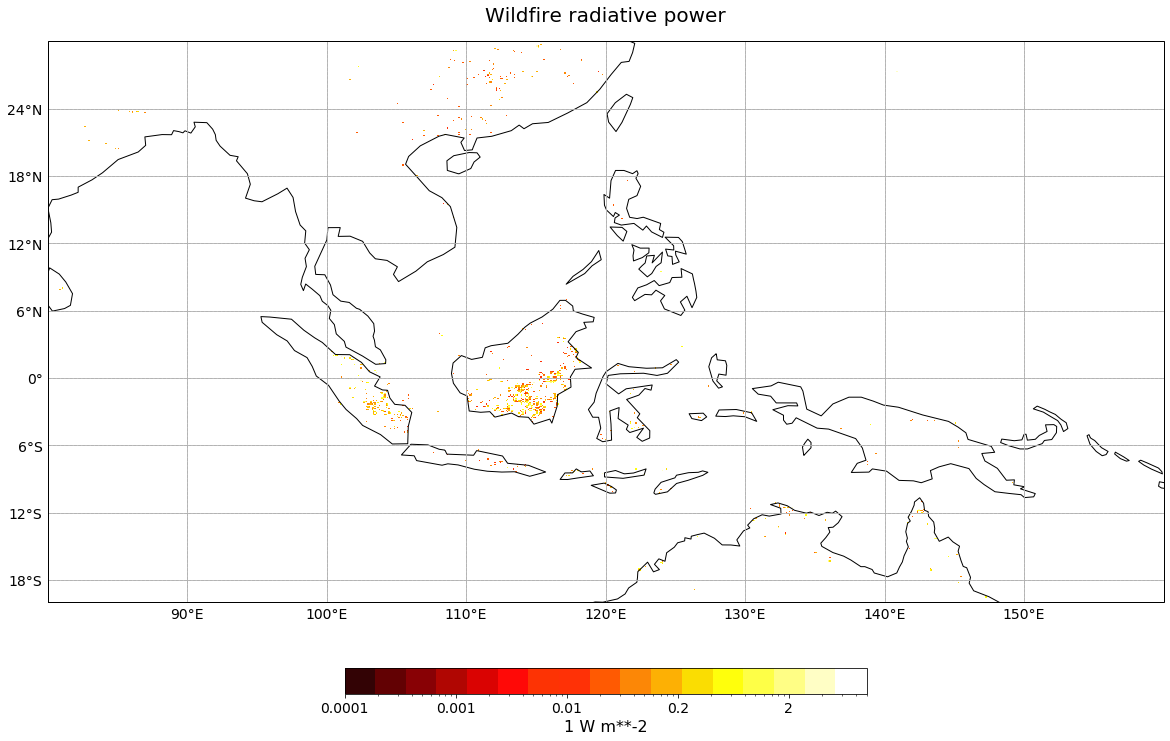

In [26]:
visualize_imshow(frpfire_subset.isel(time=1),ccrs.PlateCarree(),[lonmin,lonmax,latmin,latmax],1,'YlOrRd',0.0001,5, set_global=False)

<br>

## <a id="load_ggf"></a>Load, browse and plot CAMS Greenhouse Gas Fluxes

In [ ]:
year = 2003
month_ = 7

# Create a figure
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=crs.PlateCarree())

extent = [5, 35, -15, 10]
ax.set_extent(extent)

ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')

month = "{}{:02d}".format(year, month_)
dataset = Dataset("./eodata/cams/cams_ghg_fluxes/z_cams_l_lsce_{}_v18r2_ra_sfc_mm_co2flux.nc".format(month))

co2_flux = dataset.variables['flux_apos_bio'][:, :]
lats = dataset.variables['latitude'][:]
lons = dataset.variables['longitude'][:]

cmap = get_cmap("PiYG_r", 21)
vmin = -.12
vmax = .12
clevs = np.arange(vmin, vmax, 0.01)

plt.pcolormesh(lons, lats, co2_flux, cmap=cmap, vmin=vmin, vmax=vmax) #, transform=crs.PlateCarree())

co2_flux = dataset.variables['flux_apos_bio'][:, :]
lats = dataset.variables['latitude'][:]
lons = dataset.variables['longitude'][:]

cmap = get_cmap("PiYG_r", 21)
vmin = -.12
vmax = .12
clevs = np.arange(vmin, vmax, 0.01)

plt.pcolormesh(lons, lats, co2_flux, cmap=cmap, vmin=vmin, vmax=vmax) #, transform=crs.PlateCarree())

plt.colorbar(ax=ax, shrink=.9)
plt.title("Land surface upward mass flux of carbon\n{}  (kgC / m2 / month)".format(month))

plt.show()

## <a id="cams_forecast"></a>Load, browse and plot CAMS forecast data

In [218]:
cams_pm25 = xr.open_dataset('./eodata/cams/nrt/pm25/2018/02/201802_cams_pm25.nc')
cams_pm25

<xarray.Dataset>
Dimensions:    (latitude: 451, longitude: 900, time: 28)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 ... 358.4 358.8 359.2 359.6
  * latitude   (latitude) float32 90.0 89.6 89.2 88.8 ... -89.2 -89.6 -90.0
  * time       (time) datetime64[ns] 2018-02-02 2018-02-03 ... 2018-03-01
Data variables:
    pm2p5      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-10-09 20:10:45 GMT by grib_to_netcdf-2.13.0: grib_to_n...

<br>

In [302]:
latmin=30
latmax=70
lonmin=-30
lonmax=50


cams_pm25_xr_subset = cams_pm25.where((cams_pm25.latitude < latmax) & (cams_pm25.latitude > latmin) & (cams_pm25.longitude < lonmax) & (cams_pm25.longitude > lonmin),drop=True)

pm25 = cams_pm25_xr_subset.isel(time=7)['pm2p5']
pm25.values[pm25.values<0]=np.nan
pm25*1e+9

<xarray.DataArray 'pm2p5' (latitude: 99, longitude: 125)>
array([[ 18.66306 ,  18.603487,  18.484343, ...,   2.146635,   1.848548,
          2.564093],
       [ 18.901573,  18.842001,  18.722631, ...,   1.311946,   1.311946,
          1.490662],
       [ 18.364971,  18.245829,  18.126457, ...,   1.848548,   1.967692,
          2.087063],
       ...,
       [ 38.935925,  37.38569 ,  65.17155 , ..., 165.34364 ,  97.84674 ,
         30.588354],
       [ 16.87431 ,  14.847046,  25.460394, ..., 109.47383 ,  97.48897 ,
         58.07601 ],
       [ 13.237241,  14.608531,  18.18603 , ...,  69.762794,  61.59405 ,
         61.355537]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.4 0.8 1.2 1.6 ... 48.4 48.8 49.2 49.6
  * latitude   (latitude) float32 69.6 69.2 68.8 68.4 ... 31.6 31.2 30.8 30.4
    time       datetime64[ns] 2018-02-09

In [305]:
def visualize_imshow(data_array, projection, extent,conversion_factor, color_scale, vmin, vmax, set_global=False):
    """ 
    Visualizes a numpy MaskedArray with matplotlib's 'imshow' function.
    
    Parameters:
        data_array: any numpy MaskedArray, e.g. loaded with the NetCDF library and the Dataset function
        projection: a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
        extent: list with the following order - [min(lon),max(lon),max(lat),min(lat)]
        conversion_factor(float): any number to convert the DataArray values
        color_scale(str): string taken from matplotlib's color ramp reference  
        vmin(int): minimum number on visualisation legend
        vmax(int): maximum number on visualisation legend
        set_global: set True, if the plot shall have a global coverage
    """
    fig=plt.figure(figsize=(20, 12))

    ax=plt.axes(projection=projection)
    ax.coastlines()
    ax.gridlines()
    if(set_global):
        ax.set_global()

 #   ax.set_title(data_array.long_name, fontsize=20, pad=20.0)

    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    
    gl.xlabel_style={'size':14}
    gl.ylabel_style={'size':14}


    cmap = 'Spectral_r'
#    bounds=[10,30,50,100,150,200,500,700]
#    norm = colors.BoundaryNorm(bounds, cmap.N)
    
    img1 = plt.imshow(data_array[:]*conversion_factor,
           extent=extent,
           cmap=cmap,
           aspect='auto',
           norm=LogNorm(vmin=1, vmax=1000))



    cbar = fig.colorbar(img1, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
#    cbar.set_label(str(conversion_factor) + ' ' + data_array.units, fontsize=16)
#    cbar.ax.tick_params(labelsize=14)
#    cbar.ax.set_xticklabels([0.0001,0.001,0.01, 0.05,0.2,5])
    
    plt.show()

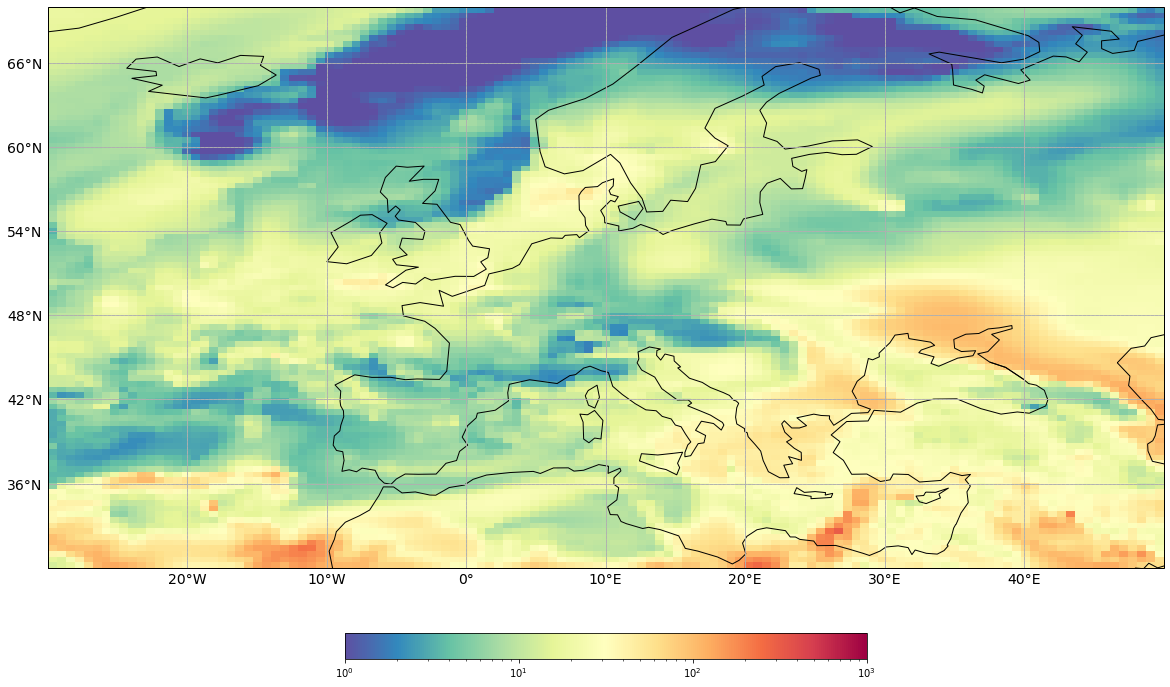

In [306]:
visualize_imshow(pm25,ccrs.PlateCarree(),[lonmin,lonmax,latmin,latmax],1e+9,'viridis',0,5, set_global=False)

<br>

<a href="./23_ltpy_v01_Sentinel5p_L2_data.ipynb"><< 23 - Copernicus Sentinel-5 Precursor (Sentinel-5P) </a><span style="float:right;"><a href="./31_ltpy_v01_AC_SAF_L2_case_study.ipynb">31 - AC SAF Level 2 - Case studies >></a></span>

<hr>

<p style="text-align:left;">This project is licensed under the <a href="./LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eo-lab/training-atmospheric-composition/">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:training@eumetsat.int>Contact</a></span></p>